In [4]:
# Задача
# 1. Сгенерируйте набор данных для предсказания временных последовательностей. Выполните тренировку RNN
# 2. Модифицируйте сеть, используя в качестве рекуррентного слоя LSTM слой библиотеки pytorch.
# https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

In [5]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Генерация данных
def generate_data(seq_length=50, num_samples=1000):
    x = np.linspace(0, 100, num_samples)
    y = np.sin(x) + 0.1 * np.random.normal(0, 1, num_samples)
    sequences, targets = [], []
    for i in range(len(y) - seq_length):
        sequences.append(y[i:i + seq_length])
        targets.append(y[i + seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 50
X, y = generate_data(seq_length)

# Конвертация в тензоры
X_tensor = torch.FloatTensor(X).unsqueeze(-1)
y_tensor = torch.FloatTensor(y)

train_size = int(0.8 * len(X_tensor))
train_dataset = TensorDataset(X_tensor[:train_size], y_tensor[:train_size])
test_dataset = TensorDataset(X_tensor[train_size:], y_tensor[train_size:])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [6]:
import torch.nn as nn
import torch.optim as optim

class RNNPredictor(nn.Module):
    def __init__(self, input_size=1, hidden_size=20, output_size=1):
        super(RNNPredictor, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, h_n = self.rnn(x)
        out = self.fc(h_n[-1])
        return out

RNNmodel = RNNPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(RNNmodel.parameters(), lr=0.01)

# Обучение модели
num_epochs = 50
for epoch in range(num_epochs):
    RNNmodel.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = RNNmodel(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')


Epoch [1/50], Loss: 0.0960
Epoch [2/50], Loss: 0.0217
Epoch [3/50], Loss: 0.0187
Epoch [4/50], Loss: 0.0176
Epoch [5/50], Loss: 0.0171
Epoch [6/50], Loss: 0.0159
Epoch [7/50], Loss: 0.0150
Epoch [8/50], Loss: 0.0154
Epoch [9/50], Loss: 0.0153
Epoch [10/50], Loss: 0.0157
Epoch [11/50], Loss: 0.0145
Epoch [12/50], Loss: 0.0144
Epoch [13/50], Loss: 0.0142
Epoch [14/50], Loss: 0.0154
Epoch [15/50], Loss: 0.0146
Epoch [16/50], Loss: 0.0156
Epoch [17/50], Loss: 0.0150
Epoch [18/50], Loss: 0.0136
Epoch [19/50], Loss: 0.0149
Epoch [20/50], Loss: 0.0147
Epoch [21/50], Loss: 0.0145
Epoch [22/50], Loss: 0.0147
Epoch [23/50], Loss: 0.0158
Epoch [24/50], Loss: 0.0152
Epoch [25/50], Loss: 0.0172
Epoch [26/50], Loss: 0.0141
Epoch [27/50], Loss: 0.0139
Epoch [28/50], Loss: 0.0139
Epoch [29/50], Loss: 0.0149
Epoch [30/50], Loss: 0.0158
Epoch [31/50], Loss: 0.0142
Epoch [32/50], Loss: 0.0171
Epoch [33/50], Loss: 0.0164
Epoch [34/50], Loss: 0.0174
Epoch [35/50], Loss: 0.0165
Epoch [36/50], Loss: 0.0159
E

In [7]:
class LSTMPredictor(nn.Module):
    def __init__(self, input_size=1, hidden_size=20, output_size=1):
        super(LSTMPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

LSTMmodel = LSTMPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(LSTMmodel.parameters(), lr=0.01)

# Обучение модели
num_epochs = 50
for epoch in range(num_epochs):
    LSTMmodel.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = LSTMmodel(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')


Epoch [1/50], Loss: 0.1703
Epoch [2/50], Loss: 0.0182
Epoch [3/50], Loss: 0.0178
Epoch [4/50], Loss: 0.0154
Epoch [5/50], Loss: 0.0142
Epoch [6/50], Loss: 0.0141
Epoch [7/50], Loss: 0.0138
Epoch [8/50], Loss: 0.0131
Epoch [9/50], Loss: 0.0124
Epoch [10/50], Loss: 0.0131
Epoch [11/50], Loss: 0.0136
Epoch [12/50], Loss: 0.0130
Epoch [13/50], Loss: 0.0148
Epoch [14/50], Loss: 0.0125
Epoch [15/50], Loss: 0.0121
Epoch [16/50], Loss: 0.0129
Epoch [17/50], Loss: 0.0118
Epoch [18/50], Loss: 0.0123
Epoch [19/50], Loss: 0.0131
Epoch [20/50], Loss: 0.0126
Epoch [21/50], Loss: 0.0125
Epoch [22/50], Loss: 0.0117
Epoch [23/50], Loss: 0.0119
Epoch [24/50], Loss: 0.0115
Epoch [25/50], Loss: 0.0119
Epoch [26/50], Loss: 0.0117
Epoch [27/50], Loss: 0.0121
Epoch [28/50], Loss: 0.0124
Epoch [29/50], Loss: 0.0116
Epoch [30/50], Loss: 0.0120
Epoch [31/50], Loss: 0.0114
Epoch [32/50], Loss: 0.0114
Epoch [33/50], Loss: 0.0114
Epoch [34/50], Loss: 0.0118
Epoch [35/50], Loss: 0.0119
Epoch [36/50], Loss: 0.0118
E

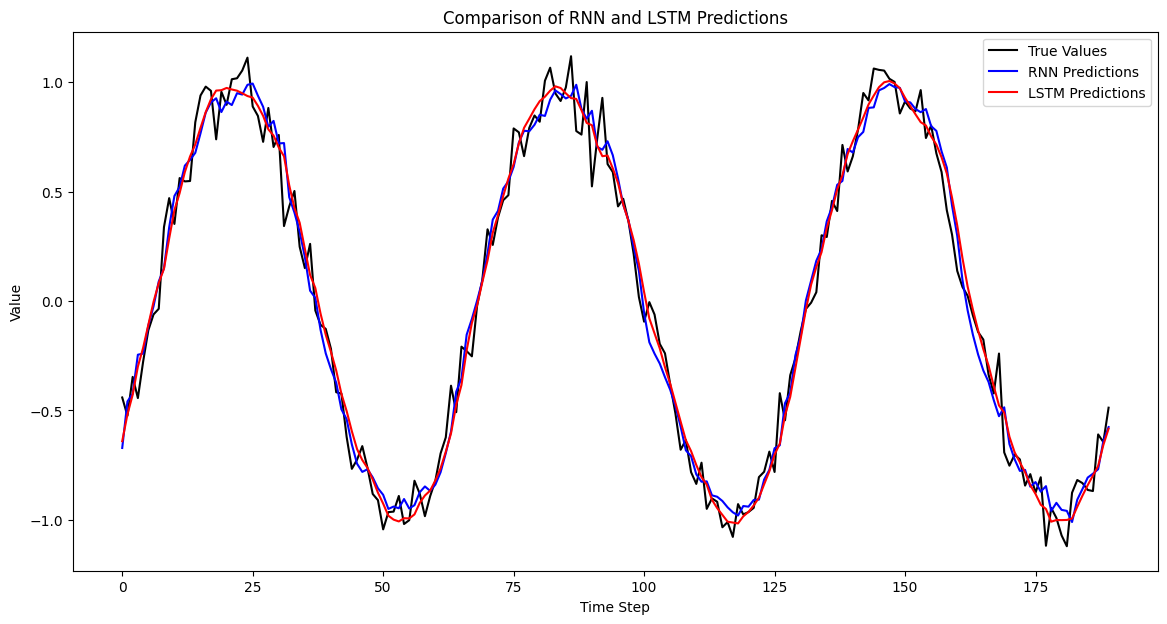

In [8]:
# Функция для получения предсказаний модели
def get_predictions(model, data_loader):
    model.eval()
    predictions, true_values = [], []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            y_pred = model(X_batch)
            predictions.extend(y_pred.squeeze().tolist())
            true_values.extend(y_batch.tolist())
    return predictions, true_values

# Получение предсказаний для RNN
rnn_predictions, true_values = get_predictions(RNNmodel, test_loader)

# Получение предсказаний для LSTM
lstm_predictions, _ = get_predictions(LSTMmodel, test_loader)

# Построение графиков
plt.figure(figsize=(14, 7))

plt.plot(true_values, label='True Values', color='black')
plt.plot(rnn_predictions, label='RNN Predictions', color='blue')
plt.plot(lstm_predictions, label='LSTM Predictions', color='red')

plt.title('Comparison of RNN and LSTM Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()


In [9]:
# Задания из 7 лекции

In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Параметры для исследования
P, D, Q = 3, 0, 0

# Загрузка и разбиение данных
df = pd.read_csv('datasets/ETTh1.csv')
N = 2
dfs = np.array_split(df, N)

train, test = dfs[0], dfs[1]
train_values = train.OT
test_values = test.OT

c:\Users\mimim\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [47]:
def change_params(train_values, test_values):
    results = []
    best_mse = float('inf')
    best_order = None
    best_model = None

    for p in range(1, 4):
        for d in range(1, 4):
            for q in range(1, 4):
                try:
                    model = ARIMA(train_values, order=(p, d, q))
                    fitted_model = model.fit()
                    start = len(train_values)
                    end = len(train_values) + len(test_values) - 1
                    predictions = fitted_model.predict(start=start, end=end)
                    mse = mean_squared_error(test_values, predictions)

                    results.append({'p': p, 'd': d, 'q': q, 'MSE': mse})
                    if mse < best_mse:
                        best_mse = mse
                        best_order = (p, d, q)
                        best_model = fitted_model
                except Exception:
                    continue

    results_df = pd.DataFrame(results).sort_values(by='MSE')
    return best_model, best_order, best_mse, results_df

c:\Users\mimim\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\mimim\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\mimim\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\mimim\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starti

Comparsion p, d, q:
    p  d  q           MSE
21  3  2  1  5.804020e+01
4   1  2  2  5.979151e+01
5   1  2  3  5.991387e+01
13  2  2  2  5.991492e+01
12  2  2  1  6.035812e+01
14  2  2  3  6.195175e+01
3   1  2  1  6.428137e+01
23  3  2  3  6.472791e+01
22  3  2  2  7.398603e+01
0   1  1  1  1.432346e+02
20  3  1  3  1.530634e+02
10  2  1  2  1.531470e+02
19  3  1  2  1.532106e+02
11  2  1  3  1.532125e+02
18  3  1  1  1.533940e+02
2   1  1  3  1.534523e+02
1   1  1  2  1.538856e+02
9   2  1  1  1.539163e+02
25  3  3  2  1.532192e+03
26  3  3  3  3.995908e+03
17  2  3  3  4.407282e+03
16  2  3  2  8.474070e+04
8   1  3  3  6.463548e+05
7   1  3  2  1.045346e+06
15  2  3  1  6.218843e+06
24  3  3  1  6.869305e+06
6   1  3  1  1.435114e+07

Best params ARIMA: (3, 2, 1) with MSE: 58.04


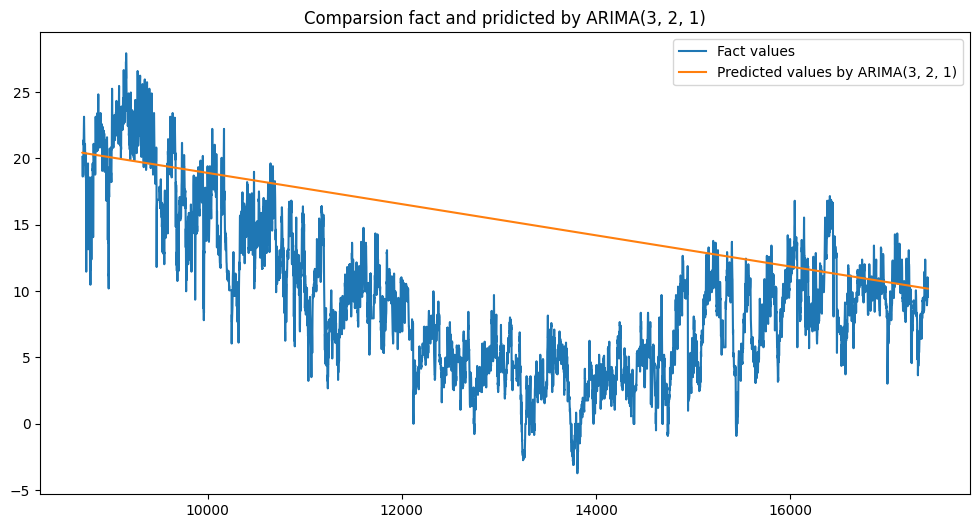

In [48]:
best_model, best_order, best_mse, results_df = change_params(train_values, test_values)

print("Comparsion p, d, q:")
print(results_df)

print(f"\nBest params ARIMA: {best_order} with MSE: {best_mse:.2f}")

start = len(train_values)
end = len(train_values) + len(test_values) - 1
predictions = best_model.predict(start=start, end=end)

plt.figure(figsize=(12, 6))
plt.plot(test_values, label='Fact values')
plt.plot(predictions, label=f'Predicted values by ARIMA{best_order}')
plt.legend()
plt.title(f'Comparsion fact and pridicted by ARIMA{best_order}')
plt.show()

In [ ]:
# Итеративное предсказание

alpha = 1

model = ARIMA(train_values, order=(3, 2, 1)).fit()
predictions = []
forecast_result = model.forecast(steps=1)

current_prediction = forecast_result[0] if isinstance(forecast_result, (list, np.ndarray)) else forecast_result.iloc[0]

for i in range(len(test_values)):
    true_value = test_values.iloc[i]
    predictions.append(current_prediction)
    current_prediction = alpha * true_value + (1 - alpha) * current_prediction

mse = mean_squared_error(test_values, predictions)
print(f'MSE: {mse}')


MSE: 0.5476326044346225
